In [1]:
import torch
import matplotlib.pyplot as plt
import random
import os
import numpy as np


import sys
from pathlib import Path

# Add parent directory to the Python path
sys.path.append(str(Path().resolve().parent))

from Simulate import simulate_parallel, simulate_reference

In [2]:
c = 299792458   


def downsample_tensor(tensor, factor):
    """
    Downsamples a 1D tensor by the given factor by taking every nth sample.
    
    Args:
        tensor (torch.Tensor): The input 1D tensor.
        factor (int): The downsampling factor.
        
    Returns:
        torch.Tensor: The downsampled tensor.
    """
    if len(tensor.shape) != 1:
        raise ValueError("Input tensor must be 1D")
    return tensor[::factor]

# Define Example parameters
deltat = 0.0194e-12  # Time step
L = 2**12  # Number of time points

# Generate reference pulse
reference_pulse = simulate_reference(L, deltat)

In [3]:
# Load the dataset with weights_only=False
file_path = "train_3_layer_100k_nonoise_n1to8.pt"

data = torch.load(f'{file_path}', weights_only=False)

# Extract components
synthetic_data = data["synthetic_data"]
material_params = data["material_params"]
num_layers = data["num_layers"]

print("Dataset loaded successfully!")
print(f"Number of samples: {len(synthetic_data)}")
print(f"Shape of synthetic_data: {synthetic_data.shape}")
print(f"Shape of num_layers: {num_layers.shape}")
print(f"Example number of layers: {num_layers[:10]}")
print()
print(f'Example set of material params')
print(material_params[random.randint(0, len(synthetic_data))])

Dataset loaded successfully!
Number of samples: 100000
Shape of synthetic_data: torch.Size([100000, 1024])
Shape of num_layers: torch.Size([100000])
Example number of layers: tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Example set of material params
[(np.complex128(5.435157315501614-0.009993960756406184j), np.float64(0.0004606643717774165)), (np.complex128(3.734931990528033-0.018316333120556527j), np.float64(0.00031003265657502733)), (np.complex128(3.4228706502458595-0.0875821252637052j), np.float64(0.0001147974960170113))]


In [4]:
file_size = os.path.getsize(f'{file_path}')

file_size_MB = file_size / (1024*1024)

print(f'File size: {file_size_MB:.2f} MB')

File size: 427.92 MB


Num layers: 3
Material parameters: [(np.complex128(4.598010622788151-0.04921214411522176j), np.float64(0.00037082201363473444)), (np.complex128(5.78297176389869-0.015439423827394022j), np.float64(0.00013029227763181666)), (np.complex128(1.906172479230304-0.023257496196920302j), np.float64(0.0003716065657737884))]


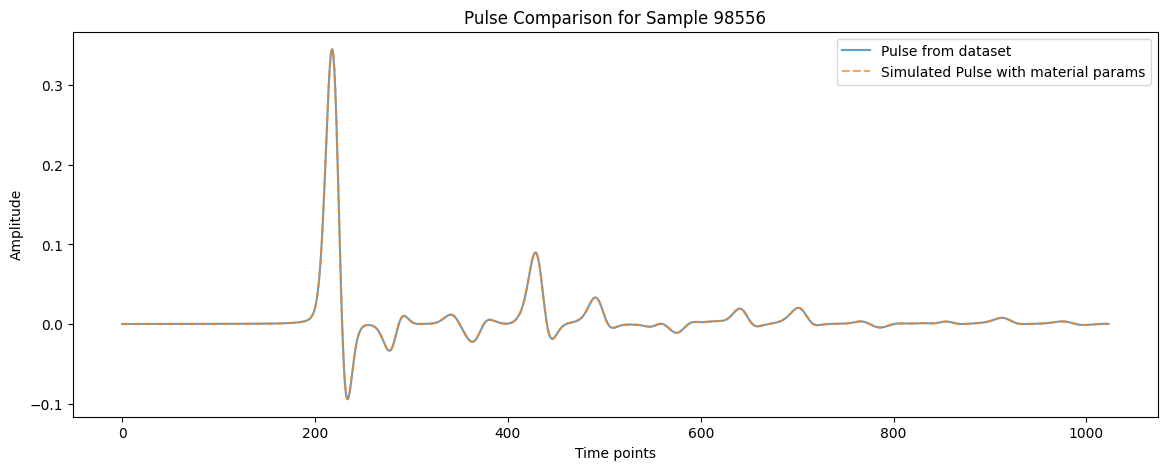

Sample 98556 comparison complete.
Num layers: 3
Material parameters: [(np.complex128(4.392321054335577-0.013856842689410107j), np.float64(0.000450982510599277)), (np.complex128(3.389244046488104-0.06627100244743521j), np.float64(6.360276452672541e-05)), (np.complex128(5.480477396646604-0.08245309059548679j), np.float64(0.00012126750597498952))]


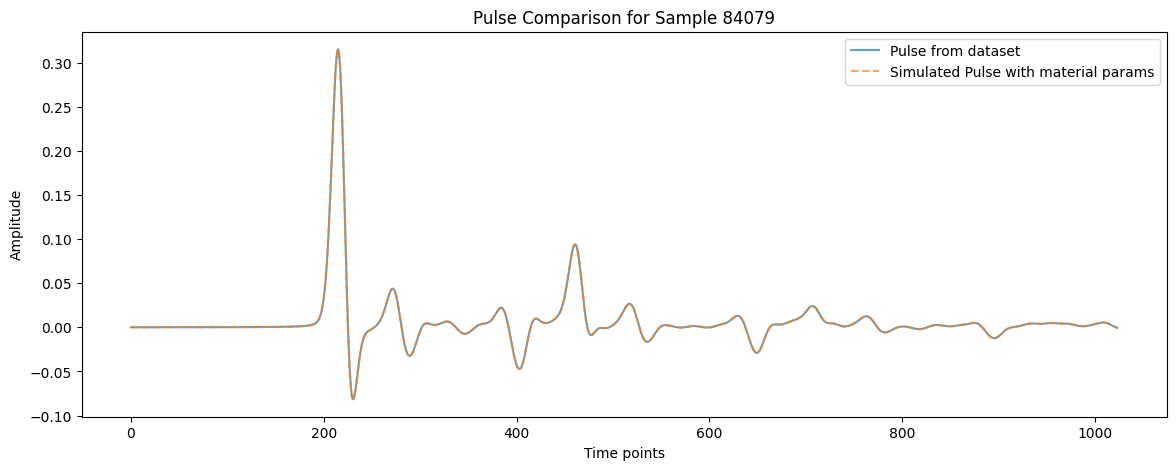

Sample 84079 comparison complete.
Num layers: 3
Material parameters: [(np.complex128(1.1718349233456562-0.003959890289880794j), np.float64(7.303600306149299e-05)), (np.complex128(7.590664703992667-0.01368915734973726j), np.float64(0.00025021168597969944)), (np.complex128(6.260411994901348-0.031612326913811245j), np.float64(0.00018036475605351745))]


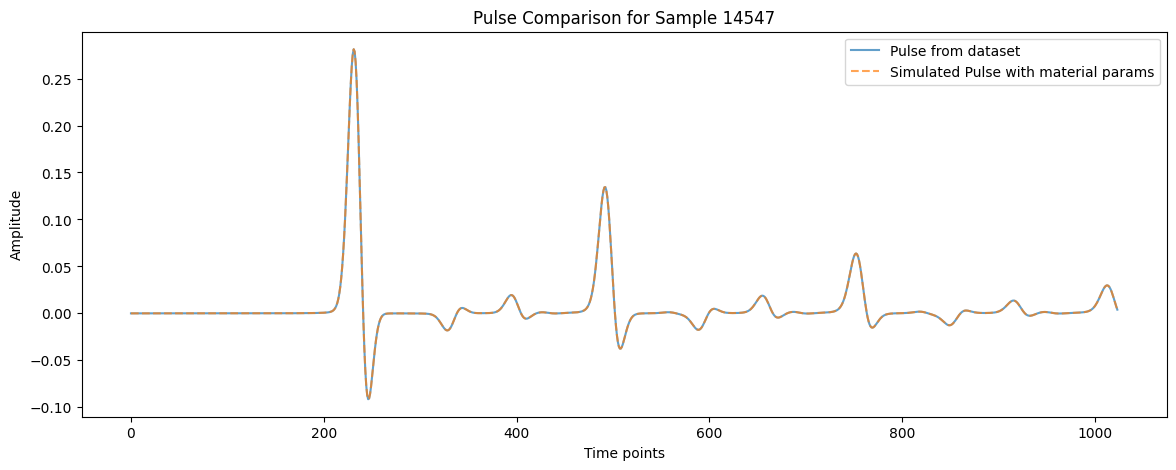

Sample 14547 comparison complete.
Num layers: 3
Material parameters: [(np.complex128(1.5808581760135942-0.02098176205098659j), np.float64(0.00039898531322185354)), (np.complex128(5.2299531512762965-0.06053420912418937j), np.float64(0.00024483620010068717)), (np.complex128(7.580787521061591-0.015403431925972405j), np.float64(0.0001447538110620772))]


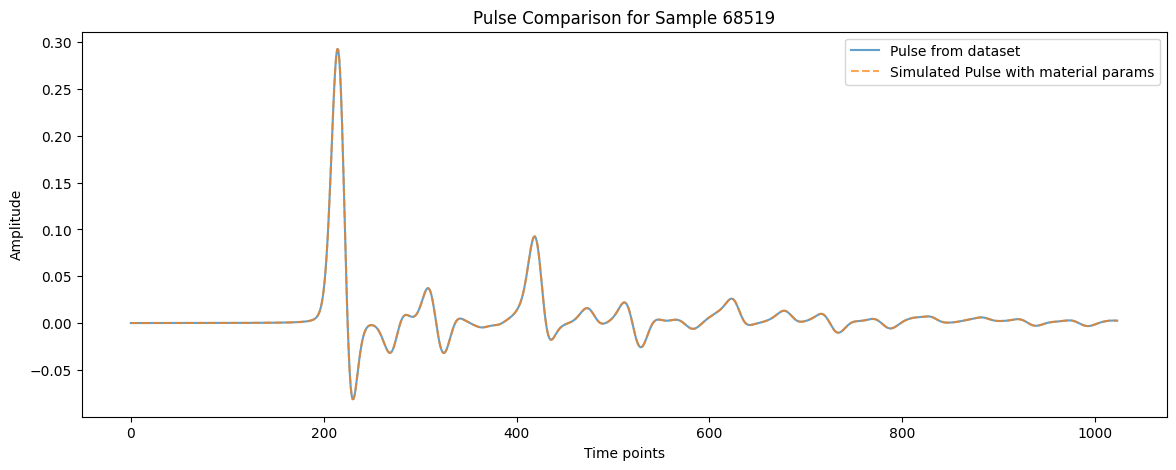

Sample 68519 comparison complete.
Num layers: 3
Material parameters: [(np.complex128(2.4168718900900013-0.03664187025616876j), np.float64(0.0004011577984438631)), (np.complex128(3.6429479103744518-0.011540816834793369j), np.float64(0.00042053856712963853)), (np.complex128(7.699914414256694-0.009205665330747487j), np.float64(0.0003196725561172014))]


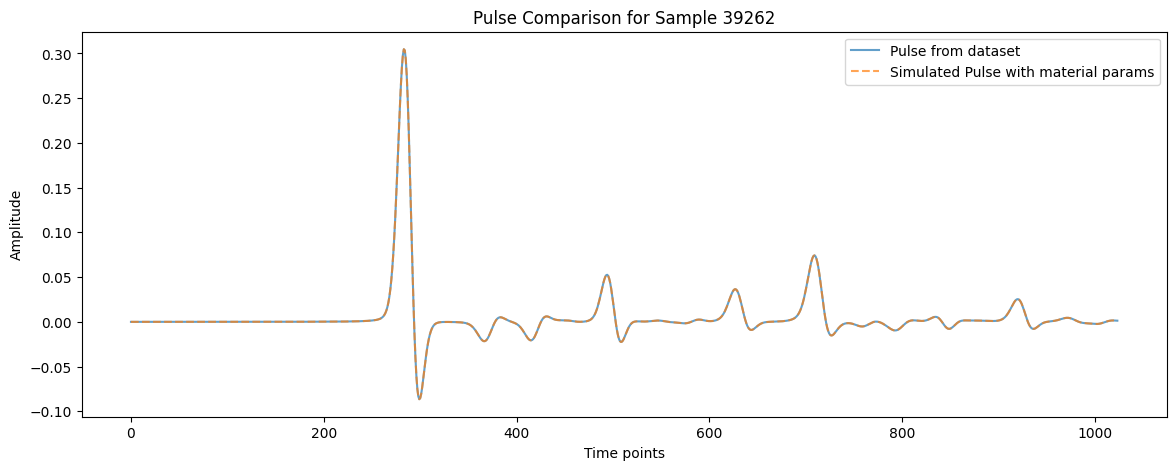

Sample 39262 comparison complete.


In [5]:
# Sample 5 random datapoints
num_samples = len(synthetic_data)
random_indices = np.random.choice(num_samples, 5, replace=False)

# Plot the pulses and compare them
for idx in random_indices:
    # Get the material parameters and the reference pulse for this sample
    material_sample = material_params[idx]
    print(f'Num layers: {len(material_sample)}')
    print(f'Material parameters: {material_sample}')
    # Simulate the pulse with the material parameters
    simulated_pulse = simulate_parallel(reference_pulse, material_sample, deltat, 0)[1].detach().cpu()[:L]
    simulated_pulse = downsample_tensor(simulated_pulse, 4)

    # Get the saved pulse from the dataset
    saved_pulse = synthetic_data[idx].cpu()


    # Plot both the simulated pulse and the saved pulse
    plt.figure(figsize=(14, 5))
    plt.plot(saved_pulse, label='Pulse from dataset', alpha=0.7)
    plt.plot(simulated_pulse, label='Simulated Pulse with material params', alpha=0.7, linestyle='--')
    plt.title(f"Pulse Comparison for Sample {idx}")
    plt.xlabel("Time points")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

    print(f"Sample {idx} comparison complete.")